In [ ]:
#Google Colab bağlantısı
import pandas as pd
import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Veri ön işleme ve veri artırma
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_path = "/content/gdrive/MyDrive/Colab Notebooks/veri3_akciğer/Lung X-Ray Image/Lung X-Ray Image"


train_datagen = ImageDataGenerator(rescale=1. /255,rotation_range = 90,
                                   validation_split=0.1,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1. /255, validation_split=0.1)

train_datagen = train_datagen.flow_from_directory(base_path, target_size=(224,224), subset="training", batch_size=32, shuffle=True)

test_datagen = test_datagen.flow_from_directory(base_path, target_size=(224,224), subset="validation", batch_size=32, shuffle=True)

Found 3128 images belonging to 3 classes.
Found 347 images belonging to 3 classes.


In [ ]:
import pylab as pl
from tensorflow.keras import layers, activations
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten

#model kurma kısmı
model = Sequential()

model.add(layers.Conv2D(filters=32, activation="relu", kernel_size=(5,5), input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=64, activation="relu", kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=64, activation="relu", kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=128, activation="relu", kernel_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(50, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(100, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(100, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(50, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(3, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │       4,000,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,111,205 (15.68 MB)

 Trainable params: 4,111,205 (15.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Model optimizasyonu yapıyoruz.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [ ]:
#Modelimizin eğitimini yapıyoruz.
result = model.fit(train_datagen, epochs=100, verbose=1, validation_data=test_datagen)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 709ms/step - accuracy: 0.5638 - loss: 1.1175 - val_accuracy: 0.7205 - val_loss: 0.7952
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 505ms/step - accuracy: 0.6228 - loss: 1.0002 - val_accuracy: 0.6513 - val_loss: 0.8554
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 518ms/step - accuracy: 0.6433 - loss: 0.9831 - val_accuracy: 0.7925 - val_loss: 0.7465
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 479ms/step - accuracy: 0.6464 - loss: 0.9636 - val_accuracy: 0.8098 - val_loss: 0.7131
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 52s 485ms/step - accuracy: 0.7033 - loss: 0.8792 - val_accuracy: 0.7666 - val_loss: 0.7950
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 485ms/step - accuracy: 0.7066 - loss: 0.8690 - val_accuracy: 0.7435 - val_loss: 0.7926
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 516ms/step - accuracy: 0.7151 - loss: 0.8477 - val_accuracy: 0.7781 - val_loss: 0.7234
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 496ms/step - accuracy: 0.7379 - loss: 0.8201 - 

In [ ]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']

In [ ]:
epoch = range(1,len(acc)+ 1)

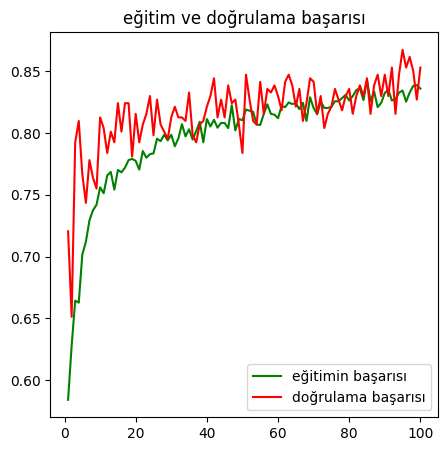

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epoch, acc, label=("eğitimin başarısı"), color="g")
plt.plot(epoch, val_acc, label=("doğrulama başarısı"), color="r")
plt.title("eğitim ve doğrulama başarısı")
plt.legend()

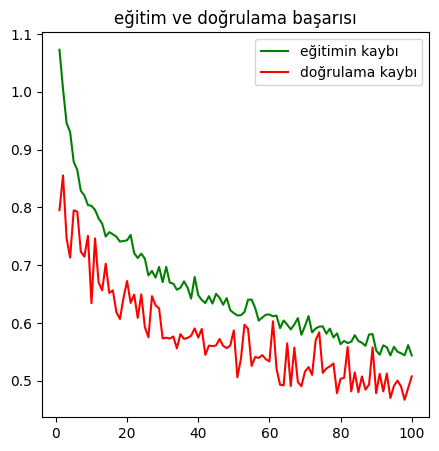

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epoch, loss, label=("eğitimin kaybı"), color="g")
plt.plot(epoch, val_loss, label=("doğrulama kaybı"), color="r")
plt.title("eğitim ve doğrulama başarısı")
plt.legend()

In [ ]:
model.save("save_model/cancer.h5")

In [ ]:
model.save_weights("save_model/cancer.weights.h5")

In [ ]:
results = model.evaluate(test_datagen, batch_size=32)
print("test_loss, test accuracy",results)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.8302 - loss: 0.5471
test_loss, test accuracy [0.5074941515922546, 0.8530259132385254]
